In [0]:
from google.colab import drive
drive.mount('/content/drive/')

In [2]:
import tensorflow as tf 
tf.test.gpu_device_name() 

'/device:GPU:0'

In [0]:
from google.colab import files
files.upload()

#**Download the Anime Data**



> 



![alt text](https://pbs.twimg.com/media/DyRx2rqVsAA19LG.jpg)

>



In [0]:
!ls -lha kaggle.json
!pip install -q kaggle 

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d splcher/animefacedataset

In [0]:
!unzip animefacedataset.zip

#**Code:--**

In [3]:
import os
import string
from matplotlib import pyplot as plt
from math import floor
import seaborn as sns
import pandas as pd
import numpy as np
import random
from scipy import ndarray      # n-dimensional Array
import skimage as sk           # used for image Processing
from skimage import transform
from skimage import util
import warnings
import keras
warnings.filterwarnings('ignore')  # remove the warnings
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from keras.regularizers import l2 # for model
from keras.layers import Input,Conv2D,Dense, Dropout, BatchNormalization, MaxPooling2D, Activation, Flatten, AvgPool2D,InputLayer,GlobalAveragePooling2D,LSTM,Embedding,Conv2DTranspose,Reshape
from keras.layers import  BatchNormalization as btn
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Model, Sequential
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras.callbacks import LearningRateScheduler,EarlyStopping   
from IPython.display import HTML
import base64
from keras.optimizers import RMSprop
from imblearn.over_sampling import SMOTE
from scipy.ndimage.interpolation import shift
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import cifar10
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
import cv2 as cv
import keras.utils as kp
import math
import librosa as lb
import glob
import IPython.display as ipd
from google.colab.patches import cv2_imshow
from PIL import Image,ImageDraw                              # Used to create GIF
import random
from random import seed

%matplotlib inline


np.random.seed(100)

Using TensorFlow backend.


In [4]:
!ls /content/drive/My\ Drive/DC\ GAN-Anime/

data  Data_Sampling.ipynb  DC-GAN.ipynb  predict-images  real_data.npy


In [5]:
%cd /content/drive/My\ Drive/DC GAN-Anime/                         

/content/drive/My Drive/DC GAN-Anime


#**Load Real Data**

In [0]:
true_data = np.load('real_data.npy',allow_pickle=True)

In [0]:
epochs = 120                            # no. of epochs 
batch_size = 64                         # batch size
steps_epoch = 467                       # No. of steps in a epoch
save_path = 'predict-images'            # save path

In [0]:
if not (os.path.isdir(save_path)):                       # Used to create directory.
  os.mkdir(save_path)

In [9]:
!pwd

/content/drive/My Drive/DC GAN-Anime


In [0]:
true_data1 = (true_data/127.5) - 1                           # Here we make the values in between -1 to 1 in order to reduce the computation 
                                                            # and we also use the tanh in generator model that makes the value in between -1 to 1.

#**GAN Architecture**
![alt text](https://pathmind.com/images/wiki/gan_schema.png)

#**Discriminator**

In [11]:
def discriminator():

  disc = Sequential()

  disc.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=RandomNormal(0,0.02), input_shape =(64,64,3)))
  disc.add(LeakyReLU(alpha=0.2))
  # disc.add(BatchNormalization(momentum=0.5))
  # disc.add(Dropout(0.4))


  disc.add(Conv2D(filters=128, kernel_size=3, padding='same', strides=2, kernel_initializer=RandomNormal(0,0.02)))
  disc.add(LeakyReLU(alpha=0.2))
  # disc.add(BatchNormalization(momentum=0.5))
  # disc.add(Dropout(0.45))

  
  # disc.add(Conv2D(filters=128, kernel_size=3, padding='same', strides=2, kernel_initializer=RandomNormal(0,0.02)))
  # disc.add(LeakyReLU(alpha=0.2))
  # disc.add(BatchNormalization(momentum=0.5))

  
  disc.add(Conv2D(filters=256, kernel_size=3, padding='same', strides=2, kernel_initializer=RandomNormal(0,0.02)))
  disc.add(LeakyReLU(alpha=0.2))
  # disc.add(BatchNormalization(momentum=0.5))
  

  disc.add(Conv2D(filters=512, kernel_size=3, padding='same', strides=2, kernel_initializer=RandomNormal(0,0.02)))
  disc.add(LeakyReLU(alpha=0.2))
  # disc.add(BatchNormalization(momentum=0.5))

  disc.add(Flatten())
  disc.add(Dropout(0.4))                     
  disc.add(Dense(1, activation = 'sigmoid'))


  
  # Setting up the optimizer.
  optimizer = Adam( lr=0.0002,beta_1=0.5)


  

  disc.compile(optimizer = optimizer, loss='binary_crossentropy')


  return disc


'''
Hyperparameters used :-

  activation =  Use leaky relu of alpha to 0.2
  kernel_initializer = RandomNormal which has mean to 0 and std is 0.02
  Dropout = Use dropout layer of prob between 0.4 to 0.7
  learning rate:  0.0002
  beta_1: 0.5 
  Fully Connected Layers:- It is necessary to not use the fully connected layers in Discriminator, not even after the Flatten layer just connect to output.

'''   

'\nHyperparameters used :-\n\n  activation =  Use leaky relu of alpha to 0.2\n  kernel_initializer = RandomNormal which has mean to 0 and std is 0.02\n  Dropout = Use dropout layer of prob between 0.4 to 0.7\n  learning rate:  0.0002\n  beta_1: 0.5 \n  Fully Connected Layers:- It is necessary to not use the fully connected layers in Discriminator, not even after the Flatten layer just connect to output.\n\n'

In [13]:
disc = discriminator()
disc.summary()                        # summary of the discriminator

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 128)       3584      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 512)        

#**Generator**

In [0]:
def generator():

  gen = Sequential()
  
  gen.add(Dense(4*4*512, kernel_initializer=RandomNormal(0,0.02), input_shape=(100,)))
  gen.add(LeakyReLU(alpha=0.2))
  # gen.add(BatchNormalization(momentum=0.5))
  
  gen.add(Reshape(target_shape=(4,4,512)))
                                                               #  output :-    4*4*512  where image is 4*4 and no. of filters are 512


  gen.add(Conv2DTranspose(256, 4, strides=2, padding='same', kernel_initializer=RandomNormal(0, 0.02)))
  gen.add(LeakyReLU(alpha=0.2))
  # gen.add(BatchNormalization(momentum=0.5))                     # output :  8*8*256

 
  gen.add(Conv2DTranspose(256, 4, padding='same', strides=2, kernel_initializer=RandomNormal(0, 0.02)))
  gen.add(LeakyReLU(alpha=0.2))
  # gen.add(BatchNormalization(momentum=0.5))                      # output :  16*16*128

  gen.add(Conv2DTranspose(128, 4, kernel_initializer=RandomNormal(0, 0.02),strides=2, padding='same'))
  gen.add(LeakyReLU(alpha=0.2))
  # gen.add(BatchNormalization(momentum=0.5))                           # output : 32*32*128


  gen.add(Conv2DTranspose(128,3, kernel_initializer=RandomNormal(0, 0.02), strides=2, padding='same'))
  gen.add(LeakyReLU(alpha=0.2))
  # gen.add(BatchNormalization(momentum=0.5))                          # output : 64*64*64


  # gen.add(Conv2D(256, 3, kernel_initializer=RandomNormal(0, 0.02), padding='same'))
  # gen.add(LeakyReLU(alpha=0.2))
  # gen.add(BatchNormalization(momentum=0.5))


  gen.add(Conv2D(3, 3, kernel_initializer=RandomNormal(0, 0.02), activation='tanh', padding='same'))


  optimizer =  Adam(lr=0.0002,beta_1 = 0.5)


  gen.compile(optimizer=optimizer, loss='binary_crossentropy')


  return gen



In [15]:
gen = generator()
gen.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8192)              827392    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 256)         2097408   
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 16, 16, 256)       1048832   
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 16, 16, 256)      

#**GAN MODEL**

In [16]:
disc.trainable = False                        # Here we not train the descriminator when the generator is training.
noise = 100

generator_input = Input(shape=(noise,))
fake_image = gen(generator_input)                      # generator is responsible for the creating the 64*64 image

gan_output = disc(fake_image)                         # Discriminator is responsible for providing the labels 0 or 1 to depict the fake and real img.
                                                      

gan = Model(generator_input,gan_output)

optimizer = Adam(lr=0.0002,beta_1=0.5)

gan.compile(optimizer= optimizer, loss='binary_crossentropy')


'''
Here what we trying to do is first creating the images or fake images from generator and then pass it to the discriminator. Model is comprising
both models in it i.e Generator and Discriminator.

'''


'\nHere what we trying to do is first creating the images or fake images from generator and then pass it to the discriminator. Model is comprising\nboth models in it i.e Generator and Discriminator.\n\n'

In [17]:
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 64, 64, 3)         4649091   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1659265   
Total params: 6,308,356
Trainable params: 4,649,091
Non-trainable params: 1,659,265
_________________________________________________________________


In [18]:
print(type(gen))
print(type(disc))

<class 'keras.engine.sequential.Sequential'>
<class 'keras.engine.sequential.Sequential'>


In [19]:
for layers in gan.layers:
  print(layers, layers.trainable)

'''
Here what we see is at first we provide the noise as an input to the generator. The first line in the output shows that input_layer is not trainable
which is very much true. In the 2nd line of the output, layers are trainable which is offcourse when we generate the 64*64 images from noise and last line
shows that generated image in is passed to the discriminator then layers of the discriminator is not trainable and that's what we wanted.  
'''

<keras.engine.input_layer.InputLayer object at 0x7fd6ca2a1748> False
<keras.engine.sequential.Sequential object at 0x7fd6ca381a90> True
<keras.engine.sequential.Sequential object at 0x7fd6ca411978> False


"\nHere what we see is at first we provide the noise as an input to the generator. The first line in the output shows that input_layer is not trainable\nwhich is very much true. In the 2nd line of the output, layers are trainable which is offcourse when we generate the 64*64 images from noise and last line\nshows that generated image in is passed to the discriminator then layers of the discriminator is not trainable and that's what we wanted.  \n"

#**Noise Image Demo**

(-0.5, 31.5, 31.5, -0.5)

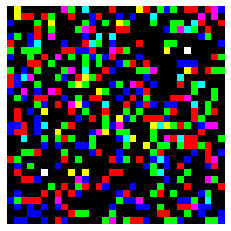

In [20]:
noise_demo = np.random.normal(0,1,size=(1,3072))
noise_demo_1 = noise_demo.reshape((1,32,32,3))
plt.imshow(noise_demo_1[0].astype(np.uint8))                     # This is the description that how Noise image looks like.
plt.axis('off')

#**Show New Generate Images**

In [0]:
def show_new_images(static_noise, epoch=None):

  generate_images = gen.predict(static_noise)              # After the training of the generator for respective no. of epochs we generate the images
  plt.figure(figsize=(10,10))
  generate_images = (generate_images+1) * 127.5

  for i,image in enumerate(generate_images):
    if (i==25):
      break
    else:  
      plt.subplot(5,5,i+1)

      plt.imshow(image.reshape((64,64,3)).astype(np.uint8))
      plt.axis('off')

  plt.tight_layout()


  if epoch != None and save_path != None:
    plt.savefig(f'{save_path}/gan_images_epoch-{epoch}.png')                      # this is used for saving the figure by providing the path.


  plt.show()  

#**Training**

In [24]:
static_noise = np.random.normal(0,1,size =(batch_size,100))             # This is basically used to generate the images from genrator 

for epoch in range(1,epochs+1):                    # loop starts for the epoch
  for batch in range(steps_epoch):                 # loop for the batches

    noise = np.random.normal(0,1,size=(batch_size,100))               # batch size depicts the no. of images in our fake image dataset.
    fake_image = gen.predict(noise)

    real_data = true_data1[np.random.randint(0,true_data1.shape[0],size=batch_size)]    
    X_mix = np.concatenate((real_data,fake_image),axis=0)                     # mixing of the fake and true data.
    labels_mix = np.zeros(shape=(batch_size * 2))

    labels_mix[:batch_size] = 0.9                           # We does not label the true data to 1 we gives the 0.9 in order to have label smoothening.

    disc_loss = disc.train_on_batch(X_mix,labels_mix)           # Here we train our discriminator with mix dataset of the real and fake images.

    fake_labels = np.ones(shape=(batch_size))              # Now in order to check the accuracy for our discriminator we create labels equal to 1 for our 
                                                           # gan model that first train the generator, create images and then pass the images to it.

    gan_loss = gan.train_on_batch(noise,fake_labels)


  print(f'Epoch:{epoch}  \t Discriminator loss:  {disc_loss} \t\t  Generator Loss: {gan_loss} ')

  if( (epoch%10) == 0):
    show_new_images(static_noise,epoch)
    

Output hidden; open in https://colab.research.google.com to view.

#**GIF of Images Generated by Generator**

In [0]:
def func(img_path):
  
  num = int(''.join(i for i in img_path if i.isdigit()))

  return num 


In [0]:
generate_images = os.listdir(save_path)              # returns the list of all the images present in this directory

frames = []

for image in sorted(generate_images,key = func):
  frames.append(Image.open(save_path +'/'+image))


frames[0].save('gan_generator.gif',format='GIF',append_images=frames[1:],save_all=True,duration=200,loop=0)


In [0]:
disc.save('discriminator.h5')
gen.save('generator.h5')
gan.save('GAN.h5')

#**Rough**

In [0]:
#ls = ['gan_images_epoch-6.png','gan_images_epoch-8.png','gan_images_epoch-12.png','gan_images_epoch-2.png']

In [0]:
#ls = ['gan_images_epoch-6.png','gan_images_epoch-8.png','gan_images_epoch-12.png','gan_images_epoch-2.png']
# sorted(ls,key = func)

['gan_images_epoch-2.png',
 'gan_images_epoch-6.png',
 'gan_images_epoch-8.png',
 'gan_images_epoch-12.png']

In [27]:
!pwd

/content/drive/My Drive/DC GAN-Anime


In [0]:
for layers in disc.layers:
  print(layers, layers.trainable)

<keras.layers.convolutional.Conv2D object at 0x7fd02ee4de10> True
<keras.layers.advanced_activations.LeakyReLU object at 0x7fd02ee4d358> True
<keras.layers.normalization.BatchNormalization object at 0x7fd2042c6e48> True
<keras.layers.convolutional.Conv2D object at 0x7fd02f160fd0> True
<keras.layers.advanced_activations.LeakyReLU object at 0x7fd02f17dfd0> True
<keras.layers.normalization.BatchNormalization object at 0x7fd02f9fc320> True
<keras.layers.convolutional.Conv2D object at 0x7fd02f9ef198> True
<keras.layers.advanced_activations.LeakyReLU object at 0x7fd02fa0e588> True
<keras.layers.normalization.BatchNormalization object at 0x7fd02f28a898> True
<keras.layers.convolutional.Conv2D object at 0x7fd02f287048> True
<keras.layers.advanced_activations.LeakyReLU object at 0x7fd029445908> True
<keras.layers.normalization.BatchNormalization object at 0x7fd029449630> True
<keras.layers.core.Flatten object at 0x7fd02943ce48> True
<keras.layers.core.Dropout object at 0x7fd02941df60> True
<ker

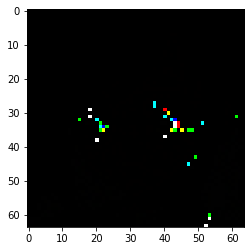

In [22]:
plt.imshow(true_data[29999].astype(np.uint8))

In [0]:
op = (true_data[29999] + 1) * 127.5
plt.imshow(op.astype(np.uint8))

In [0]:
op = true_data1[np.random.randint(0,true_data.shape[0],size=batch_size)]

In [42]:
op.shape

(64, 64, 64, 3)

In [34]:
np.random.randint(0,true_data.shape[0],size=batch_size)

array([14031, 18732,  3574, 13255,  9664,   879, 29444,  3611,  5228,
         330,  6189,  4866,  4143, 16508, 24982,  2107,  5410,  6656,
       24772, 11693,  2344,  9538, 11623, 18248, 22602, 15307,  3488,
       10870,  2265,  1463,  3941,  7678,  6615,  8137, 10678, 13472,
        4131, 10385, 28056, 12115,  6766, 17117, 15837,  5417, 22467,
        1609, 18721, 20098,  7152, 23246,  5567, 25781,  2618, 19363,
       14542, 19264, 17517, 29061,  5563, 25789, 23273,  6657,  7804,
       25981])

In [35]:
np.random.randint(0,true_data.shape[0],size=batch_size)

array([ 1188,  9892, 10349, 16998,    84, 24756, 12824,  2642, 10993,
        5051,  8195, 14522,  3160, 20551, 20587, 22656, 27140, 12820,
       14578, 23239,  3508, 18477, 21810, 16282,   722, 19470, 23240,
       14065, 19796, 19273, 29438,  9315, 16600, 11154,  4358,  3624,
       15373,  9607, 20138, 16151, 10492, 27253, 18069,  5067, 27545,
       26571, 29118, 29819, 13022,  5167,   200,  3506, 25691,  6472,
       25508, 16335,  4069,  5632, 13775, 11468,  2165, 24227, 20901,
       16430])

In [36]:
true_data.dtype

dtype('float32')

In [0]:
a = []
while(1):
  a.append(1)